In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from matplotlib.ticker import MultipleLocator
import scipy.stats as sts


In [84]:
# Files to load
city_data_to_load = "/users/Test/Resources/city_data.csv"
ride_data_to_load = "/users/Test/Resources/ride_data.csv"

In [85]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [86]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [7]:
sum(city_data_df["type"]=="Suburban")

36

In [8]:
sum(city_data_df["type"]=="Rural")

18

In [9]:
# Inspect Ride Data DataFrame

In [10]:
# Get the columns and the rows that are not null using count().
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# Get the columns and the rows that are null using isnull().
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# Merge DataFrames

# new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

In [14]:
# Combine the data into a single dataset using pd.merge
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# Create DataFrames for Each Type of City

In [16]:
# Create the Urban city DataFrame. city type will be Urban only
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
#urban_cities_df.head()

In [17]:
# Create the Suburban city DataFrames. Suburban city type only
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

#suburban_cities_df.head()

In [18]:
# # Create the Rural city DataFrames.

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

#rural_cities_df.head()

In [19]:
# We’ll use the groupby() function to create a Series of data that has the
# name of the city as the index

# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
#urban_ride_count.head()


In [20]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
#rural_ride_count.head()

In [21]:
# Using the separate DataFrames for each city type, we can calculate the average fare for
# each city in the urban, suburban, and rural cities.
# Using the groupby() function, we can chain the mean() method to get the averages of 
# the fare column.


# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
#urban_avg_fare.head()

In [22]:
# Get average fare for each city in the suburban.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

#suburban_avg_fare.head()

In [23]:
# Get average fare for each city in rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

#rural_avg_fare.head()

In [24]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
#urban_driver_count.head()

In [25]:
# Get the average number of drivers for each city for the suburban.

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

#suburban_driver_count.head()

In [26]:
# Get the average number of drivers for each city for the rural cities.

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

#rural_driver_count.head()

In [27]:
# Get Total fare for each city in the suburban.
Total_suburban_fare = suburban_cities_df.groupby(["city"]).sum()["fare"]

#Total_suburban_fare.head()

In [28]:
# Get Total fare for each city in the Urban.
Total_urban_fare = urban_cities_df.groupby(["city"]).sum()["fare"]

#Total_urban_fare.head()

In [29]:
# Get Total fare for each city in the suburban.
Total_rural_fare = rural_cities_df.groupby(["city"]).sum()["fare"]

#Total_rural_fare.head()

In [30]:
# Pandas describe() Function

# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [31]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [32]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [33]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [34]:
# Calculate the mode of the ride count for the urban cities.
#urban_ride_count.mode()

In [35]:
# Calculate the mode of the ride count for the urban cities.
#suburban_ride_count.mode()

In [36]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
#urban_fares.head()

In [37]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
#suburban_fares.head()

In [38]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
#rural_fares.head()

In [39]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
#urban_drivers.head()

In [40]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
#suburban_drivers.head()

In [41]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
#rural_drivers.head()

In [42]:
# Technical Analysis Deliverable 1: A Summary DataFrame

In [43]:
# Get average Fare per Ride
Ave_Fare_Per_Ride = pyber_data_df.groupby(["type"]).mean()["fare"]

Ave_Fare_Per_Ride.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [44]:
# Get the sum of the fares for each city type.
Total_Fares = sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

Total_Fares



type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [45]:
# Get the sum of the drivers for each city type
Total_Drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]

Total_Drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [46]:
# Get the sum of the Rides for each city type
Total_Rides = pyber_data_df.groupby(["type"]).sum()["driver_count"]

Total_Rides

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [47]:
Ave_Fare_Per_Driver = Total_Fares / Total_Drivers

Ave_Fare_Per_Driver


type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [48]:
content={'Total Rides': Total_Rides, 'Total Driver': Total_Drivers, 'Total Fares': Total_Fares, 'Ave Fare Per Ride': Ave_Fare_Per_Ride, 'Ave Fare Per Driver': Ave_Fare_Per_Driver}

summary_df = pd.DataFrame(content)

summary_df

,Total Rides,Total Driver,Total Fares,Ave Fare Per Ride,Ave Fare Per Driver
type,,,,,
Rural,537,537,4327.93,34.623440,8.059460
Suburban,8570,8570,19356.33,30.970128,2.258615
Urban,59602,59602,39854.38,24.525772,0.668675


In [49]:
# Here we delete the index name "type" from the summary DataFrame

summary_df.index.name = None

summary_df

,Total Rides,Total Driver,Total Fares,Ave Fare Per Ride,Ave Fare Per Driver
Rural,537,537,4327.93,34.623440,8.059460
Suburban,8570,8570,19356.33,30.970128,2.258615
Urban,59602,59602,39854.38,24.525772,0.668675


In [80]:
# Pandas describe() Function

# Get summary statistics.
summary_df.describe()

,Total Rides,Total Driver,Total Fares,Ave Fare Per Ride,Ave Fare Per Driver
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,22903.000000,22903.000000,21179.546667,30.039780,3.662250
std,32035.054596,32035.054596,17833.262507,5.112718,3.890189
min,537.000000,537.000000,4327.930000,24.525772,0.668675
25%,4553.500000,4553.500000,11842.130000,27.747950,1.463645
50%,8570.000000,8570.000000,19356.330000,30.970128,2.258615
75%,34086.000000,34086.000000,29605.355000,32.796784,5.159037
max,59602.000000,59602.000000,39854.380000,34.623440,8.059460


In [50]:
# Technical Analysis Deliverable 2: 
# Multiple-Line Plot for the Sum of the Fares for Each City Type

In [51]:
# Combine the data into a single dataset using pd.merge
# pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [52]:
# (1) Rename columns {'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}.

pyber_data_df.rename(columns = {'city':'City','date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace = True) 
   
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [53]:
# (2) Set the index to the Date column.
new_pyber_data_df = pyber_data_df.set_index('Date')

new_pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [54]:
# (3) Create a new DataFrame,for fares, and include only 
# the City Type and Fare columns using the copy() method on
# the merged DataFrame.

city_type_fare_df = new_pyber_data_df[['City Type', 'Fare']].copy()
city_type_fare_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [55]:
# (4) Set the index to the datetime data type
#new_city_type_fare_df = city_type_fare_df.set_index('Date')

city_type_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [56]:
# (5) Calculate the sum() of fares by the type of city and date  using groupby() 
# to create a Series.
sum_fares_by_city_type = new_pyber_data_df.groupby(["City Type", "Date"]).sum()["Fare"].reset_index()

sum_fares_by_city_type

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [57]:
# (6) Convert the groupby Series into a DataFrame in one step.
total_fare_df = pd.DataFrame(sum_fares_by_city_type)

total_fare_df.head()

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [58]:
# (7) Reset the index, then create a pivot table DataFrame with the Date as the index and columns = 'City Type'. 
# The Fare for each Date should appear in each row.

new_total_fare_df= total_fare_df.set_index("Date")

new_total_fare_df.head()

,City Type,Fare
Date,,
2019-01-01 09:45:36,Rural,43.69
2019-01-02 11:18:32,Rural,52.12
2019-01-03 19:51:01,Rural,19.90
2019-01-04 03:31:26,Rural,24.88
2019-01-06 07:38:40,Rural,47.33


In [59]:
# Create a DataFrame with Pivot table

table_df = pd.pivot_table(data=new_total_fare_df,columns="City Type",values="Fare", index=['Date'])

table_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [60]:
# Convert the index to DatetimeIndex

table_df = table_df.set_index(pd.DatetimeIndex(table_df.index.values))

In [61]:
# (8) Create a new DataFrame from the pivot table DataFrame on the 
# given dates, '2019-01-01':'2019-04-28', using loc. Hint: df.loc['start':'end']

pivot_table_df = table_df.loc['2019-01-01':'2019-04-28']

pivot_table_df.head()


City Type,Rural,Suburban,Urban
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [62]:
# Verify the tail end of the DataFrame

pivot_table_df.tail()

City Type,Rural,Suburban,Urban
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [63]:
# (9) Create a new DataFrame by setting the DataFrame you created in Step 8 with resample() in weekly bins, and calculate the 
# sum() of the fares for each week in the resampled data.

resampled_pivot_table_df = pivot_table_df.resample('1W').sum()

# resampled_pivot_table_df = pivot_table_df.resample('1W', on='Date').sum()

resampled_pivot_table_df.head()


City Type,Rural,Suburban,Urban
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


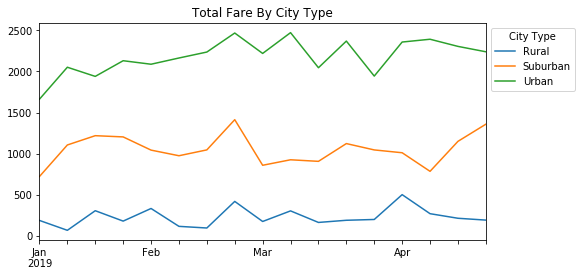

In [82]:
# (10) Using the object-oriented interface method, plot the DataFrame you 
# created in Step 9 using the df.plot() function.

resampled_pivot_table_df.plot(
    figsize=(8,4), xticks=resampled_pivot_table_df.index,title="Total Fare By City Type").legend(title='City Type', bbox_to_anchor=(1, 1))
xlabel="Month", 
ylabel="Fare $(USD)"
# Save the figure.
plt.savefig("/users/franc/Berkeley/class_folder/PyBer/Fare_City_Type_Fig1.png")